In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib as mpl
%matplotlib inline
from statsmodels import api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from pandas_profiling import ProfileReport
from sklearn.metrics import mean_squared_error, r2_score
import itertools
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from datetime import datetime
from mlxtend.plotting import plot_learning_curves
from scipy.stats import kurtosis
from scipy.stats import skew
import warnings
warnings.simplefilter('ignore')

mpl.rcParams['agg.path.chunksize'] = 100000

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Reading Data and Eda

In [6]:
farm_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/farm/farm_data.csv")

In [7]:
farm_data.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369


In [9]:
farm_data.tail()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
1444,fid_41664,1914.0,NaN,1822.663957,Sanderson Farms,location 5150
1445,fid_14529,NaN,NaN,399.297094,Obery Farms,location 5150
1446,fid_46454,1997.0,NaN,1046.552295,Sanderson Farms,location 5150
1447,fid_24103,2001.0,NaN,2766.186825,Dole Food Company,location 5150
1448,fid_34139,2001.0,NaN,8572.252713,Wayne Farms,location 5150


In [10]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/farm/train_data.csv")

In [11]:
train_data.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [13]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/farm/test_data.csv")

In [14]:
test_data.head()

,date,farm_id,ingredient_type,id
0,2017-01-01 00:00:00,fid_110884,ing_w,0.0
1,2017-01-01 00:00:00,fid_90053,ing_w,1.0
2,2017-01-01 00:00:00,fid_17537,ing_w,2.0
3,2017-01-01 00:00:00,fid_110392,ing_w,3.0
4,2017-01-01 00:00:00,fid_62402,ing_w,4.0


In [16]:
train_weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/farm/train_weather.csv")

In [17]:
train_weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


In [7]:
test_weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/farm/test_weather.csv")

In [8]:
submission_file = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/farm/sample_submission (1).csv")

# Feature Engineering-Farm Data


In [ ]:
profile=ProfileReport(farm_data)
#prof.to_file(output_file='/content/drive/MyDrive/Colab Notebooks/farm/farm_data.html')

In [ ]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369
5,fid_121604,2000.0,NaN,743.224000,Obery Farms,location 7369
6,fid_85694,1981.0,NaN,2594.409178,Dole Food Company,location 7369
7,fid_33785,1989.0,NaN,11248.137822,Obery Farms,location 7369
8,fid_110793,2003.0,NaN,5649.338527,Obery Farms,location 7369
9,fid_32954,2010.0,NaN,2508.381000,Wayne Farms,location 7369


,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
1439,fid_17905,1957.0,NaN,5248.740791,Obery Farms,location 5150
1440,fid_45360,1987.0,NaN,13962.763482,Dole Food Company,location 5150
1441,fid_70499,1951.0,NaN,2800.375129,Obery Farms,location 5150
1442,fid_100993,1993.0,NaN,9247.657523,Del Monte Foods,location 5150
1443,fid_24152,1913.0,NaN,3745.012833,Obery Farms,location 5150
1444,fid_41664,1914.0,NaN,1822.663957,Sanderson Farms,location 5150
1445,fid_14529,NaN,NaN,399.297094,Obery Farms,location 5150
1446,fid_46454,1997.0,NaN,1046.552295,Sanderson Farms,location 5150
1447,fid_24103,2001.0,NaN,2766.186825,Dole Food Company,location 5150
1448,fid_34139,2001.0,NaN,8572.252713,Wayne Farms,location 5150


In [9]:
farm_data = farm_data.drop_duplicates(subset=['farm_id'],keep='first')

In [10]:
farm_data.shape

(1434, 6)

In [11]:
farm_data.isna().sum()

farm_id                          0
operations_commencing_year     765
num_processing_plants         1085
farm_area                        0
farming_company                  0
deidentified_location            0
dtype: int64

In [12]:
farm_data['deidentified_location'].unique()

array(['location 7369', 'location 959', 'location 5489', 'location 5290',
       'location 5833', 'location 6364', 'location 565', 'location 4525',
       'location 5677', 'location 8421', 'location 1784', 'location 868',
       'location 7048', 'location 2532', 'location 5410', 'location 5150'],
      dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

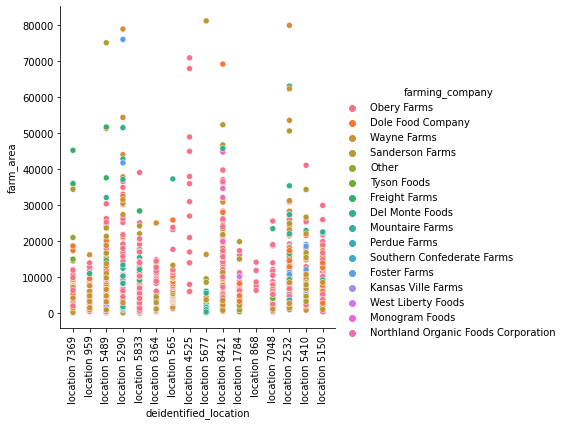

In [13]:
sns.relplot(x='deidentified_location',y='farm_area',hue='farming_company',data=farm_data)
plt.xticks(rotation='90')

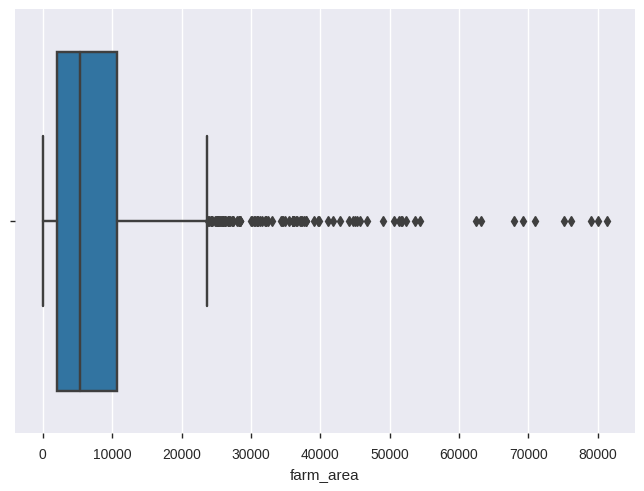

In [ ]:
sns.boxplot(x=farm_data['farm_area'])

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > low) & (df_in[col_name] < high)]
    return df_out

In [ ]:
farm_data = remove_outlier(farm_data, 'farm_area')

In [ ]:
farm_data.shape

(1330, 6)

### Train data 

In [ ]:
train_data.shape

(20216100, 4)

In [ ]:
train_data.isna().sum()

date               0
farm_id            0
ingredient_type    0
yield              0
dtype: int64

In [ ]:
train_data  = remove_outlier(train_data, 'yield')

In [ ]:
train_data.shape

(17742445, 4)

In [18]:
test_data.head()

,date,farm_id,ingredient_type,id
0,2017-01-01 00:00:00,fid_110884,ing_w,0.0
1,2017-01-01 00:00:00,fid_90053,ing_w,1.0
2,2017-01-01 00:00:00,fid_17537,ing_w,2.0
3,2017-01-01 00:00:00,fid_110392,ing_w,3.0
4,2017-01-01 00:00:00,fid_62402,ing_w,4.0


In [19]:
test_data.tail()

,date,farm_id,ingredient_type,id
18480805,2017-12-11 12:00:00,fid_100952,ing_w,34534648.0
18480806,2017-12-11 12:00:00,fid_100952,ing_x,34534649.0
18480807,2017-12-11 12:00:00,fid_100952,ing_z,34534650.0
18480808,2017-12-11 12:00:00,fid_105588,ing_w,34534651.0
18480809,2017-12-11 12:00:00,fid_105588,in,NaN


In [20]:
test_data.shape

(18480810, 4)

# Train&Test_Weather Feature Engineering

In [ ]:
profile=ProfileReport(train_weather)
#prof.to_file(output_file='/content/drive/MyDrive/Colab Notebooks/farm/train_weather.html')

In [ ]:
train_weather = train_weather.rename(columns= {'timestamp' : 'date'})

In [ ]:
test_weather = test_weather.rename(columns= {'timestamp' : 'date'})

In [ ]:
test_weather.columns

Index(['date', 'deidentified_location', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

In [ ]:
train_weather.columns

Index(['date', 'deidentified_location', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

In [ ]:
train_weather.shape

(139773, 9)

In [ ]:
train_weather.isna().sum()

date                     0
deidentified_location    0
temp_obs                 0
cloudiness               0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
dtype: int64

In [ ]:
test_weather.isna().sum()

date                     0
deidentified_location    0
temp_obs                 0
cloudiness               0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
dtype: int64

In [ ]:
train_weather.describe()

,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,139773.000000,139773.000000,139773.000000,139773.000000,139773.000000,139773.000000,139773.000000
mean,14.418106,2.149306,180.526632,7.350158,1016.158038,0.983047,3.560527
std,10.624504,1.847228,108.994339,9.786277,7.334160,6.772037,2.333332
min,-28.900000,0.000000,0.000000,-35.000000,968.200000,-1.000000,0.000000
25%,7.200000,2.000000,90.000000,0.600000,1012.200000,0.000000,2.100000
50%,15.000000,2.149306,180.526632,8.300000,1016.158038,0.000000,3.100000
75%,22.200000,2.149306,270.000000,14.400000,1020.400000,0.983047,5.000000
max,47.200000,9.000000,360.000000,26.100000,1045.500000,343.000000,19.000000


,Total,Percent
wind_speed,0,0.0
precipitation,0,0.0
pressure_sea_level,0,0.0
dew_temp,0,0.0
wind_direction,0,0.0


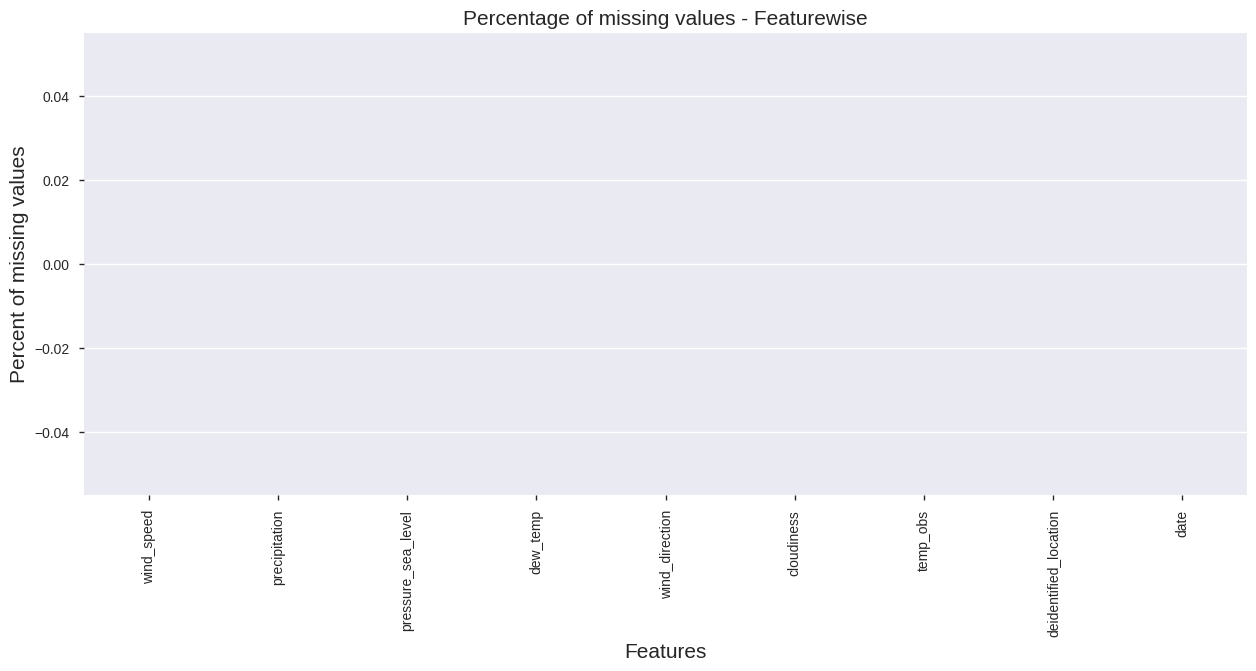

In [ ]:
total = train_weather.isnull().sum().sort_values(ascending=False)
percent = (train_weather.isnull().sum()/train_weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
f, ax = plt.subplots(figsize=(15,6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index,y=missing_data['Percent'])
plt.xlabel('Features',fontsize=15)
plt.ylabel("Percent of missing values", fontsize=15)
plt.title('Percentage of missing values - Featurewise', fontsize = 15)
missing_data.head()

In [ ]:
train_weather['cloudiness'] = train_weather['cloudiness'].fillna(train_weather['cloudiness'].mean())
train_weather['temp_obs'] = train_weather['temp_obs'].fillna(train_weather['temp_obs'].mean())
train_weather['wind_direction'] = train_weather['wind_direction'].fillna(train_weather['wind_direction'].mean())
train_weather['dew_temp'] = train_weather['dew_temp'].fillna(train_weather['dew_temp'].mean())
train_weather['pressure_sea_level'] = train_weather['pressure_sea_level'].fillna(train_weather['pressure_sea_level'].mean())
train_weather['precipitation'] = train_weather['precipitation'].fillna(train_weather['precipitation'].mean())
train_weather['wind_speed'] = train_weather['wind_speed'].fillna(train_weather['wind_speed'].mean())

In [ ]:
test_weather['cloudiness'] = test_weather['cloudiness'].fillna(test_weather['cloudiness'].mean())
test_weather['temp_obs'] = test_weather['temp_obs'].fillna(test_weather['temp_obs'].mean())
test_weather['wind_direction'] = test_weather['wind_direction'].fillna(test_weather['wind_direction'].mean())
test_weather['dew_temp'] = test_weather['dew_temp'].fillna(test_weather['dew_temp'].mean())
test_weather['pressure_sea_level'] = test_weather['pressure_sea_level'].fillna(test_weather['pressure_sea_level'].mean())
test_weather['precipitation'] = test_weather['precipitation'].fillna(test_weather['precipitation'].mean())
test_weather['wind_speed'] = test_weather['wind_speed'].fillna(test_weather['wind_speed'].mean())

In [ ]:
test_weather.isna().sum()

date                     0
deidentified_location    0
temp_obs                 0
cloudiness               0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
dtype: int64

In [ ]:
train_weather.isna().sum()

date                     0
deidentified_location    0
temp_obs                 0
cloudiness               0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
dtype: int64

In [ ]:
train_weather.shape

(139773, 9)

In [ ]:
train_weather = remove_outlier(train_weather, 'wind_speed')

In [ ]:
train_weather = remove_outlier(train_weather,'precipitation')

In [ ]:
train_weather = remove_outlier(train_weather,'pressure_sea_level')

In [ ]:
train_weather = remove_outlier(train_weather,'dew_temp')

In [ ]:
train_weather = remove_outlier(train_weather,'wind_direction')

In [ ]:
train_weather = remove_outlier(train_weather,'cloudiness')

In [ ]:
train_weather = remove_outlier(train_weather,'temp_obs')

###Merging Datasets

In [ ]:
New_train = pd.merge(train_data,farm_data,on = 'farm_id',how = 'inner')

In [ ]:
New_test = pd.merge(test_data,farm_data,on='farm_id',how='inner')

In [ ]:
New_test.columns

Index(['date', 'farm_id', 'ingredient_type', 'id',
       'operations_commencing_year', 'num_processing_plants', 'farm_area',
       'farming_company', 'deidentified_location'],
      dtype='object')

In [ ]:
New_test["ingredient_type"].unique()

array(['ing_w', 'ing_x', 'ing_z', 'ing_y'], dtype=object)

In [ ]:
cmbd_train = pd.merge(New_train,train_weather,on = ['date','deidentified_location'],how ='inner')

In [ ]:
cmbd_train = cmbd_train.drop(['operations_commencing_year','num_processing_plants'],axis=1)

In [ ]:
cmbd_test = pd.merge(New_test,test_weather,on=['date','deidentified_location'],how='inner')

In [ ]:
cmbd_test["ingredient_type"].unique()

array(['ing_w', 'ing_x', 'ing_z', 'ing_y'], dtype=object)

In [ ]:
cmbd_test = cmbd_test.drop(['operations_commencing_year','num_processing_plants'],axis=1)

In [ ]:
cmbd_test.shape

(18997544, 14)

In [ ]:
cmbd_train.shape

(14338625, 14)

In [ ]:
cmbd_train.columns

Index(['date', 'farm_id', 'ingredient_type', 'yield', 'farm_area',
       'farming_company', 'deidentified_location', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

In [ ]:
cmbd_train.head()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 01:00:00,fid_110884,ing_w,0.0,690.455096,Obery Farms,location 7369,24.4,2.149306,70.0,21.1,1020.2,-1.0,1.5
1,2016-01-01 01:00:00,fid_90053,ing_w,0.0,252.696160,Obery Farms,location 7369,24.4,2.149306,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 01:00:00,fid_17537,ing_w,0.0,499.446528,Obery Farms,location 7369,24.4,2.149306,70.0,21.1,1020.2,-1.0,1.5
3,2016-01-01 01:00:00,fid_110392,ing_w,0.0,2200.407555,Obery Farms,location 7369,24.4,2.149306,70.0,21.1,1020.2,-1.0,1.5
4,2016-01-01 01:00:00,fid_62402,ing_w,0.0,10833.140121,Obery Farms,location 7369,24.4,2.149306,70.0,21.1,1020.2,-1.0,1.5


In [ ]:
cmbd_train.describe(include='all')

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,14338625,14338625,14338625,1.433862e+07,1.433862e+07,14338625,14338625,1.433862e+07,1.433862e+07,1.433862e+07,1.433862e+07,1.433862e+07,1.433862e+07,1.433862e+07
unique,8784,1329,4,NaN,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-10-11 03:00:00,fid_63700,ing_w,NaN,NaN,Obery Farms,location 5489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2017,48071,9142848,NaN,NaN,5689310,2102273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.137076e+02,6.919159e+03,NaN,NaN,1.701365e+01,1.633206e+00,1.719867e+02,8.199925e+00,1.016249e+03,1.449655e-01,3.203350e+00
std,NaN,NaN,NaN,1.418236e+02,5.492944e+03,NaN,NaN,1.020187e+01,1.259334e+00,1.101565e+02,9.522536e+00,5.976288e+00,4.712803e-01,2.064027e+00
min,NaN,NaN,NaN,0.000000e+00,2.629155e+01,NaN,NaN,-1.340000e+01,0.000000e+00,0.000000e+00,-1.980000e+01,1.000400e+03,-1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,1.353000e+01,2.508381e+03,NaN,NaN,1.000000e+01,0.000000e+00,8.000000e+01,6.000000e-01,1.012300e+03,0.000000e+00,2.100000e+00
50%,NaN,NaN,NaN,5.596100e+01,5.527543e+03,NaN,NaN,1.780000e+01,2.149306e+00,1.805266e+02,8.900000e+00,1.016158e+03,0.000000e+00,3.100000e+00
75%,NaN,NaN,NaN,1.580470e+02,9.828301e+03,NaN,NaN,2.440000e+01,2.149306e+00,2.700000e+02,1.600000e+01,1.020100e+03,0.000000e+00,4.600000e+00


### **Preparing the Data**

### Merged Train Data

In [ ]:
all_Data = []

In [ ]:
cmbd_train = cmbd_train.drop(['farm_id','farming_company','deidentified_location','date'],axis =1)

In [ ]:
cmbd_train.dtypes

ingredient_type        object
yield                 float64
farm_area             float64
temp_obs              float64
cloudiness            float64
wind_direction        float64
dew_temp              float64
pressure_sea_level    float64
precipitation         float64
wind_speed            float64
dtype: object

In [ ]:
cmbd_train.shape

(14338625, 10)

In [ ]:
train_dummies = pd.get_dummies(cmbd_train[["ingredient_type"]])

In [ ]:
all_Data = cmbd_train.drop(["ingredient_type","yield",'farm_area'],axis=1).join(train_dummies)

In [ ]:
all_Data.head()

,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,ingredient_type_ing_w,ingredient_type_ing_x,ingredient_type_ing_y,ingredient_type_ing_z
0,24.4,2.149306,70.0,21.1,1020.2,-1.0,1.5,1,0,0,0
1,24.4,2.149306,70.0,21.1,1020.2,-1.0,1.5,1,0,0,0
2,24.4,2.149306,70.0,21.1,1020.2,-1.0,1.5,1,0,0,0
3,24.4,2.149306,70.0,21.1,1020.2,-1.0,1.5,1,0,0,0
4,24.4,2.149306,70.0,21.1,1020.2,-1.0,1.5,1,0,0,0


### Merged Test Data

In [ ]:
cmbd_test = cmbd_test.drop(['farm_id','farming_company','deidentified_location','date'],axis=1)

In [ ]:
cmbd_test.columns

Index(['ingredient_type', 'id', 'farm_area', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

In [ ]:
test_dummies = pd.get_dummies(cmbd_test[["ingredient_type"]])

In [ ]:
all_Data_test = cmbd_test.drop(["ingredient_type",'farm_area','id'],axis=1).join(test_dummies)

In [ ]:
all_Data_test.columns

Index(['temp_obs', 'cloudiness', 'wind_direction', 'dew_temp',
       'pressure_sea_level', 'precipitation', 'wind_speed',
       'ingredient_type_ing_w', 'ingredient_type_ing_x',
       'ingredient_type_ing_y', 'ingredient_type_ing_z'],
      dtype='object')

In [ ]:
all_Data_test["ingredient_type_ing_w"].

11448499

In [ ]:
all_Data_test.shape

(18997544, 11)

### **Splitting Data**

In [ ]:
X = all_Data

In [ ]:
y = cmbd_train['yield']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_val)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_val, y_pred_test))

In [ ]:
print('Random Forest:')
print('root mean squared error for train: ', rmse_train)
print('root mean squared error validation: ', rmse_test)

Random Forest:
root mean squared error for train:  125.82525592821825
root mean squared error validation:  125.77616341823268


In [ ]:
test_predict_dt = forest.predict(all_Data_test)

In [ ]:
test_predict_dt = pd.DataFrame(test_predict_dt,index = None,columns=["yield"])

In [ ]:
test_submission_id = pd.DataFrame(submission_file,columns=["id"])

In [ ]:
full_test_dt = pd.concat([test_submission_id,test_predict_dt],axis=1)

In [ ]:
full_test_dt.isna().sum()
full_test_dt['yield'] = full_test_dt['yield'].fillna(full_test_dt['yield'].mean())

In [ ]:
full_test_dt['yield']=full_test_dt['yield'].astype(int)

In [ ]:
full_test_dt.to_csv('/content/drive/MyDrive/Colab Notebooks/farm/randomforestcsvs.csv',index=False,header=True)

In [ ]:
plt.scatter(y_val, y_pred_test)
plt.ylim()
plt.xlim()

(-32.5455, 674.6555)

In [ ]:
print("MAE:", metrics.mean_absolute_error(y_val, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_test)))

MAE: 89.5808160925433
MSE: 15819.643284209973
RMSE: 125.77616341823268


# Strategy for ing_w for 12 months

In [ ]:
full_test_dt_large= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/farm/randomforestcsvs.csv")

In [ ]:
full_test_dt_large.shape,test_data.columns

((20848800, 2),
 Index(['date', 'farm_id', 'ingredient_type', 'id'], dtype='object'))

In [ ]:
test_data['date']= pd.to_datetime(test_data['date'])

In [ ]:
test_data['Month'] = test_data['date'].dt.month

In [ ]:
test_data_ing = pd.DataFrame(test_data,columns=["ingredient_type","Month"])

In [ ]:
test_data_ing.head()

,ingredient_type,Month
0,ing_w,1
1,ing_w,1
2,ing_w,1
3,ing_w,1
4,ing_w,1


In [ ]:
test_data_ing.shape

(20848800, 2)

In [ ]:
ing_type = pd.concat([full_test_dt_large,test_data_ing],axis=1)

In [ ]:
ing_type.head()

,id,yield,ingredient_type,Month
0,0,103,ing_w,1
1,1,103,ing_w,1
2,2,103,ing_w,1
3,3,103,ing_w,1
4,4,103,ing_w,1


In [ ]:
ing_type = ing_type.drop(['id'],axis=1)

In [ ]:
ing_type.head()

,yield,ingredient_type,Month
0,103,ing_w,1
1,103,ing_w,1
2,103,ing_w,1
3,103,ing_w,1
4,103,ing_w,1


In [ ]:
ing_type['ingredient_type'].unique()

array(['ing_w', 'ing_x', 'ing_z', 'ing_y'], dtype=object)

In [ ]:
ing_type['ingredient_type'].value_counts()

ing_w    12377880
ing_x     4362480
ing_y     2838240
ing_z     1270200
Name: ingredient_type, dtype: int64

In [ ]:


ing_w = ing_type[ing_type.ingredient_type == 'ing_w']



In [ ]:
ing_w.shape

(12377880, 3)

In [ ]:
new_ing = ing_w.iloc[0:12377880]

In [ ]:
new_ing_w = new_ing.dropna()

In [ ]:
new_ing_w.shape

(12377880, 3)

In [ ]:
new_ing_w.head()

,yield,ingredient_type,Month
0,103,ing_w,1
1,103,ing_w,1
2,103,ing_w,1
3,103,ing_w,1
4,103,ing_w,1


In [ ]:
new_ing_w['Month'].value_counts()

12    1051272
10    1051272
8     1051272
7     1051272
5     1051272
3     1051272
1     1051272
11    1017360
9     1017360
6     1017360
4     1017360
2      949536
Name: Month, dtype: int64

In [ ]:
Overall_stock =new_ing_w['yield'].sum()

In [ ]:
Overall_stock

1609938776